<h2> AutoEncoder(오토인코더) </h2>
<p> 오토인코더는 입력에 대한 출력을 학습하는 네트워크로 출력과 동일이 동일하다는 특징이 존재함 <br>
    인코더와 잠재변수, 디코더로 구성되어 있으며 운영체제에서 사용하는 파일 압축과 유사한 측면이 존재 <br>
    파일 압축은 압축 전후의 데이터가 동일하나 오토인코더는 손실 압축이므로 압축률이 높으나 전후 데이터의 차이가 존재한다.
</p>
<ul>
    <li> Encoder(인코더) : 입력에 가까운 레이어로 입력을 잠재변수로 변환시켜주며 특징 추출기와 같은 역할을 한다 </li>
    <li> Latent Variable(잠재변수) : 입력데이터가 압축되어 있는 레이어 </li>
    <li> Decoder(디코더) : 잠재변수를 원래 데이터로 변환시켜주는 레이어 </li>
</ul>

In [19]:
import tensorflow as tf
import numpy as np
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [20]:
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


In [21]:
train_x = train_x / 255.0
test_x = test_x / 255.0

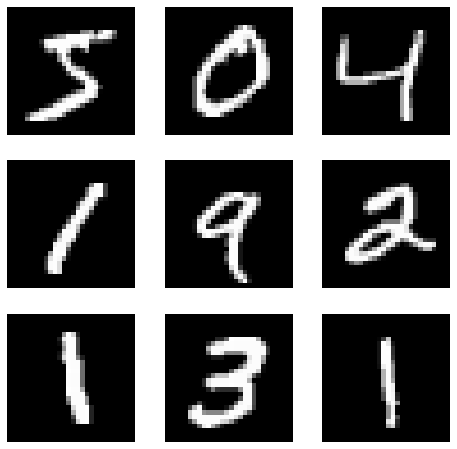

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for c in range(9) :
    plt.subplot(3,3,c+1)
    plt.imshow(train_x[c].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()

In [23]:
train_x = train_x.reshape(-1, 28*28)
test_x = test_x.reshape(-1,28*28)

In [24]:
print(train_x.shape, train_y.shape)

(60000, 784) (60000,)


In [25]:
# Flatten layer 사용 x --> 입력과 출력의 형태 동일하게 유지
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=784, activation="relu", input_shape=(784,)),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=784, activation="sigmoid")])
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.mse)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(train_x, train_x, epochs=25, batch_size=256)

Epoch 1/25
235/235 [==============================] - 2s 6ms/step - loss: 0.0507
Epoch 2/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0174
Epoch 3/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0119
Epoch 4/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0099
Epoch 5/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0088
Epoch 6/25
235/235 [==============================] - 2s 7ms/step - loss: 0.0080
Epoch 7/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0075
Epoch 8/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0070
Epoch 9/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0067
Epoch 10/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0065
Epoch 11/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0062
Epoch 12/25
235/235 [==============================] - 1s 6ms/step - loss: 0.0060
Epoch 13/25
235/235 [====

1/1 [==============================] - 0s 8ms/step


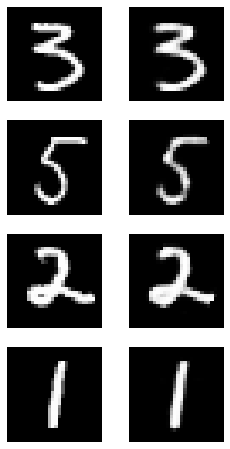

In [42]:
import random

plt.figure(figsize=(4,8))
for c in range(4) :
    plt.subplot(4,2,2*c+1)
    rand_index = random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_index].reshape(28,28), cmap="gray")
    plt.axis('off')
    
    plt.subplot(4,2,2*c+2)
    img = model.predict(np.expand_dims(test_x[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.axis("off")

plt.show()

In [43]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(7*7*64, activation="relu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding="same", activation="relu"),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding="same", activation="sigmoid")])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mse)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                200768    
                                                                 
 dense_4 (Dense)             (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)      

In [44]:
model.fit(train_x, train_x, epochs=25, batch_size=256)

Epoch 1/25
235/235 [==============================] - 4s 10ms/step - loss: 0.0784
Epoch 2/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0306
Epoch 3/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0225
Epoch 4/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0199
Epoch 5/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0188
Epoch 6/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0179
Epoch 7/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0172
Epoch 8/25
235/235 [==============================] - 3s 11ms/step - loss: 0.0168
Epoch 9/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0166
Epoch 10/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0164
Epoch 11/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0162
Epoch 12/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0161
Epoch 13/25
2

1/1 [==============================] - 0s 8ms/step


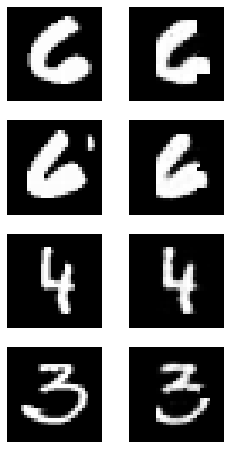

In [45]:
import random

plt.figure(figsize=(4,8))
for c in range(4) :
    plt.subplot(4,2,2*c+1)
    rand_index = random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_index].reshape(28,28), cmap="gray")
    plt.axis('off')
    
    plt.subplot(4,2,2*c+2)
    img = model.predict(np.expand_dims(test_x[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.axis("off")

plt.show()

In [46]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation="elu", input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation="elu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="elu"),
    tf.keras.layers.Dense(7*7*64, activation="elu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding="same", activation="elu"),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding="same", activation="sigmoid")])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mse)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                200768    
                                                                 
 dense_6 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 32)      

In [47]:
model.fit(train_x, train_x, epochs=25, batch_size=256)

Epoch 1/25
235/235 [==============================] - 7s 28ms/step - loss: 0.0576
Epoch 2/25
235/235 [==============================] - 7s 28ms/step - loss: 0.0163
Epoch 3/25
235/235 [==============================] - 7s 28ms/step - loss: 0.0107
Epoch 4/25
235/235 [==============================] - 7s 28ms/step - loss: 0.0090
Epoch 5/25
235/235 [==============================] - 7s 28ms/step - loss: 0.0083
Epoch 6/25
235/235 [==============================] - 7s 28ms/step - loss: 0.0077
Epoch 7/25
235/235 [==============================] - 7s 29ms/step - loss: 0.0073
Epoch 8/25
235/235 [==============================] - 7s 29ms/step - loss: 0.0070
Epoch 9/25
235/235 [==============================] - 7s 29ms/step - loss: 0.0067
Epoch 10/25
235/235 [==============================] - 7s 29ms/step - loss: 0.0065
Epoch 11/25
235/235 [==============================] - 7s 29ms/step - loss: 0.0063
Epoch 12/25
235/235 [==============================] - 7s 29ms/step - loss: 0.0062
Epoch 13/25
2

1/1 [==============================] - 0s 12ms/step


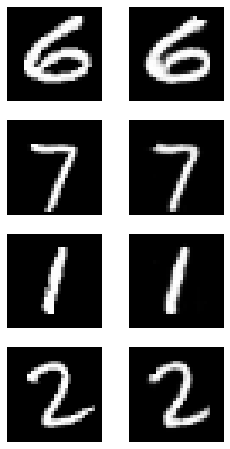

In [48]:
import random

plt.figure(figsize=(4,8))
for c in range(4) :
    plt.subplot(4,2,2*c+1)
    rand_index = random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_index].reshape(28,28), cmap="gray")
    plt.axis('off')
    
    plt.subplot(4,2,2*c+2)
    img = model.predict(np.expand_dims(test_x[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.axis("off")

plt.show()

In [67]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_x)
print(latent_vector.shape)
print(latent_vector[0])

1875/1875 [==============================] - 8s 4ms/step
(60000, 64)
[-0.99999994 -1.         24.676361   -0.9999999  20.280859    0.51497954
  4.614303    3.8336184  31.671585   10.128739   -0.9999995  22.11095
 -0.99999994 -0.9999998   2.8255796  16.216711   -1.          9.591158
 -0.99999976  4.6479816  12.53337    11.581603    0.7274648   2.8060718
 -0.9924725  23.082966   16.750477   -1.         18.66691    -0.99999994
 -0.999973   14.290698   -1.         13.364364    8.182971   -1.
 19.559631   15.592287   18.080698   24.23653    12.5137415   6.6002893
 -0.99999994 14.562189   22.319223   20.25168    -0.99999976 26.247015
 19.460663   20.485056   -0.99999994  4.794221   18.97259    19.073818
 -0.9999997  24.721733   17.226074   -1.         -0.99999994 -0.99999994
 10.405285   -0.9999999  -1.          0.9024472 ]


In [68]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=15)
kmeans.fit(latent_vector)

CPU times: user 26.9 s, sys: 13.4 s, total: 40.3 s
Wall time: 6.1 s


KMeans(n_clusters=10, n_init=15)

In [69]:
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[4 3 7 ... 4 8 4]
(10, 64)
[-0.99999994 -0.9999999  18.494993   -0.9999997  25.556734    5.907259
 15.985165    4.1347203  26.794294   22.441675   -0.9999983  21.264175
 -0.9999999  -0.9999999  15.312359   15.899098   -1.          5.623887
 -0.99999976 15.617359   10.983763   15.15702     5.328796    0.76240194
 -0.9291787  13.295668   18.68609    -0.99999994 33.291626   -0.99999917
 -0.99993515 21.739832   -1.         13.833084   14.820235   -0.9999999
 13.0356655  27.92915    15.651803   15.485623   12.48803    12.400913
 -0.99999785 15.681602   21.40443    11.649828   -0.9999998  10.749321
 14.481346   11.382516   -0.9999998  14.253356   15.112393   17.442122
 -0.999961   13.687254   10.28208    -0.99999994 -0.9999987  -0.9999999
 13.412474   -0.99999994 -0.9999999  26.068623  ]


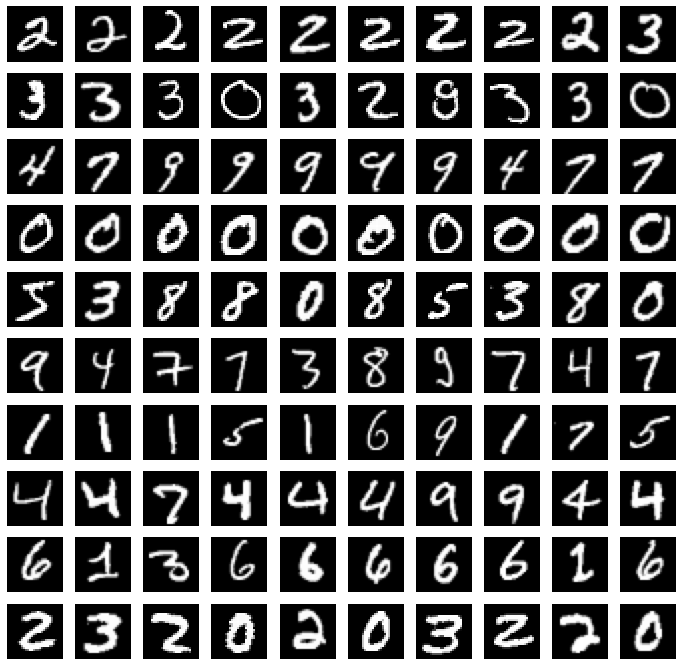

In [70]:
plt.figure(figsize=(12,12))
for i in range(10) :
    images = train_x[kmeans.labels_ == i]
    for c in range(10) :
        plt.subplot(10,10,10*i+1+c)
        plt.imshow(images[c].reshape(28,28), cmap="gray")
        plt.axis('off')
plt.show()

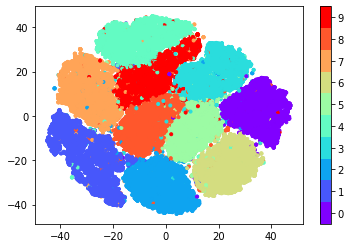

In [73]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=100, perplexity=15)
tsne_vector = tsne.fit_transform(latent_vector)

cmap = plt.get_cmap("rainbow", 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker=".", c=train_y, cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))
plt.show()

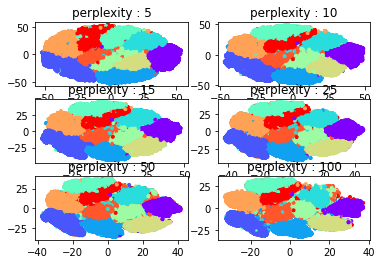

In [74]:
perplex = [5, 10, 15, 25, 50, 100]
for c in range(6) :
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplex[c])
    tsne_vector = tsne.fit_transform(latent_vector)
    
    plt.subplot(3,2,c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker=".", c=train_y, cmap="rainbow")
    plt.title("perplexity : {0}".format(perplex[c]))
    
plt.show()

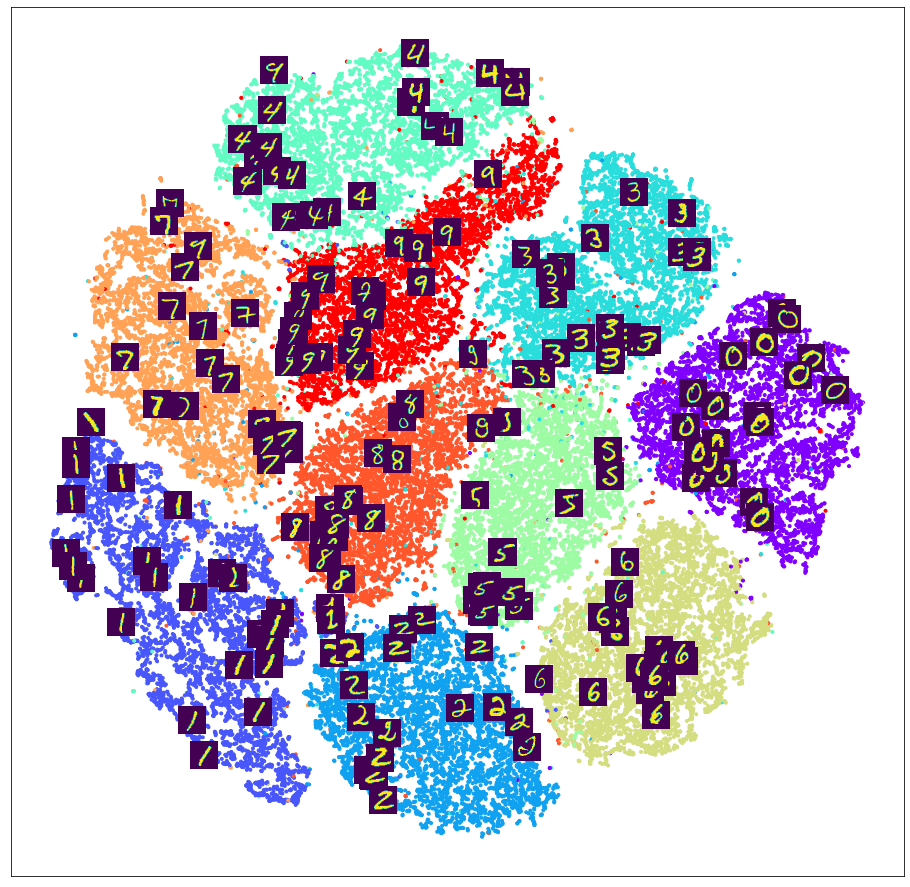

In [77]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
plt.figure(figsize=(16,16))
tsne = TSNE(n_components = 2, learning_rate=100, perplexity=15)
tsne_vector = tsne.fit_transform(latent_vector)

ax = plt.subplot(1,1,1)
ax.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker=".", c=train_y, cmap="rainbow")
for i in range(200) :
    imagebox = OffsetImage(train_x[i].reshape(28,28))
    ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
    ax.add_artist(ab)
ax.set_xticks([])
ax.set_yticks([])
plt.show()